# LAB 08: Barabási-Albert model and degree correlation

August 26th 2022

* This is a python tutorial on the Barábasi-Albert model. We will also start to compute the degree correlation matrix for neutral networks.
* There is no marking for this tutorial. You do not need to submit your solution to us, but this exercise will help you to start working on your project
* In the begining of this tutorial you will find a similar code than used in the class. In the end, there are exercises for you.
* We recommend you to solve this lab until next tuesday (August 23th).

## Barabási-Albert model

* Create a process that generates a graph with n nodes. It starts with $m_0$ nodes, and at each step a new vertice is added with m stubs that are connected to the existing nodes with probability proportional to the degree.
* Using this process, generate a network with 1000 nodes, $m_0$ = 3, $m=1$. Adjust a power law degree distribution and compare the empirical and theoretical degree distributions.
* Change the process so that it has a parameter $\alpha$, and the probability to connect a new node to an existing node with degree $k$ is propostional to $k^\alpha$.
* Create 3 graphs with 100 nodes, $m_0=1$, and $m=1$, each one with a different $\alpha$: 0, 0.5, 1, 2. Plot each graph. What does it happen as $\alpha$ increases?


In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Calculating best minimal value for power law fit
gamma = 2.5899808872407695


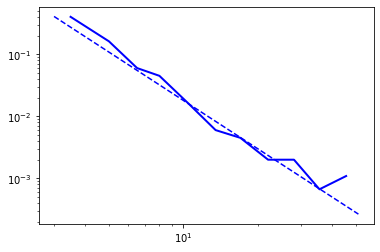

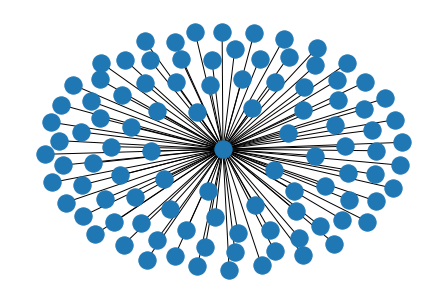

In [ ]:
import networkx as nx
import powerlaw
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

# Barabási-Albert linear model

def barabasi_albert(N, m0, m):
  G = nx.star_graph(m0-1)
  while G.number_of_nodes() < N:
    degrees = np.array(G.degree())[:,1].astype(int)
    p = degrees/sum(degrees)
    nodes = np.random.choice(G.number_of_nodes(), m, p=p, replace=False)
    new_node = G.number_of_nodes()
    for node in nodes:
      G.add_edge(new_node, node)
  return G

# Generating BA graphs

m = 1
m0 = 3
N = 100
G = barabasi_albert(N, m0, m)
#nx.draw(G)

N = 1000
G = barabasi_albert(N, m0, m)
#nx.draw(G)

# Computing the degrees
degrees = np.array(G.degree())[:,1].astype(int)

# Fitting a power law distribution
fit = powerlaw.Fit(degrees, discrete=True)
print('gamma =', fit.alpha)

# Comparing the theoretical and empirical distributions

fig1 = fit.plot_pdf(color='b', linewidth=2)
fig2 = fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig1)
plt.show()

# Non-linear preferential attachment
def barabasi_albert(N, m0, m, alpha=1):
  G = nx.star_graph(m0-1)
  while G.number_of_nodes() < N:
    degrees = np.array(G.degree())[:,1].astype(int)
    p = degrees**alpha/sum(degrees**alpha)
    nodes = np.random.choice(G.number_of_nodes(), m, p=p, replace=False)
    new_node = G.number_of_nodes()
    for node in nodes:
      G.add_edge(new_node, node)
  return G

# No preferential attachment
N = 100
m0=2
m=1
G0 = barabasi_albert(N, m0, m, alpha=0)

%matplotlib inline
nx.draw(G0)

# Sublinear regime
G1 = barabasi_albert(N, m0, m, alpha=0.5)

%matplotlib inline
nx.draw(G1)

# Linear regime
G2 = barabasi_albert(N, m0, m, alpha=1)

%matplotlib inline
nx.draw(G2)

# Superlinear regime
G2 = barabasi_albert(N, m0, m, alpha=5)

%matplotlib inline
nx.draw(G2)


## Degree correlation

* Generate a Barabási-Albert graph with $n=50$, $m_0=1$, $m=1$, and $\alpha=1$. Create a matrix $X$ such that $X_{ij}$ indicates the number of links connecting one vertice with degree $i$ and another vertice with degree $j$. Then divide it by the number of links.
* If we assume the network is neutral, what is the expected degree correlation matrix $E$?


[0.         0.         0.10204082 0.14285714 0.08163265 0.12244898
 0.         0.         0.         0.18367347]
[0.         0.10006247 0.05164515 0.04841733 0.02582257 0.03227822
 0.         0.         0.         0.05810079]


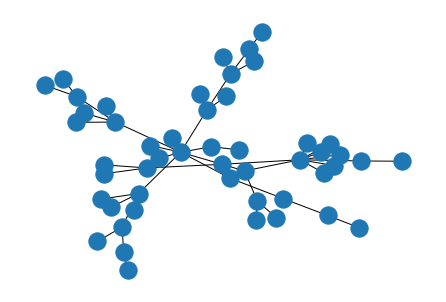

In [ ]:

# Generate BA graph
N = 50
m0 = 1
m = 1
G = nx.barabasi_albert_graph(N, m)
nx.draw(G)

# Obtain the degrees

degrees = np.array(G.degree())[:,1].astype(int)
max_degree = max(degrees)

# Initialize matrix X
X = np.zeros((max_degree+1, max_degree+1))

# Counting the number of edges connecting nodes with degrees di and dj 

for edge in G.edges:
  d1 = degrees[edge[0]]
  d2 = degrees[edge[1]]
  X[d1, d2] = X[d1, d2] + 1
  X[d2, d1] = X[d2, d1] + 1

# Convert it to the relative frequence
X = X/G.number_of_edges()

print(X[1,])

# Compute the expected probabilities for a netral network, 
# given a degree distribution

E = np.zeros((max_degree+1, max_degree+1))
avg_degree = np.mean(degrees)
q = []
for i in range(max_degree + 1):
  pi = len(np.where(degrees == i)[0])
  pi = pi/G.number_of_nodes()
  q.append(i*pi/avg_degree)

for i in range(max_degree+1):
  for j in range(max_degree+1):
    E[i,j] = q[i]*q[j]

print(E[1,:])

## Exercise 

Consider a variation of the Barabási-Albert model (as decribed in Exercise 5.2, Section 5.11 from Barabási's book) where at each step a new node is added and connected with a directed link to a node chosen with probability:
$$\Pi(k_i^{\text{in}}) = \frac{k_i^{\text{in}} + A}{\sum_j (k_j^{\text{in}} + A)}$$.

* Plot the in-degree and out-degree distribution for an instance generated by this process.

* Adjust a power law distribution for both the in and out degree distributions.




In [ ]:
# Write your code here
